In [1]:
import pandas as pd
import numpy as np


In [2]:
filepath = "train.csv"
df = pd.read_csv(filepath)

In [3]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

Drop FireplaceQu, PoolQC, Fence, MiscFeature, Alley

In [4]:
df = df.drop(['Alley'],axis=1)
df = df.drop(['PoolQC'],axis=1)
df = df.drop(['Fence'],axis=1)
df = df.drop(['MiscFeature'],axis=1)
df = df.drop(['FireplaceQu'],axis=1)

Label encoding

In [5]:
df = df.fillna(df.mean())
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [9]:
!pip install xgboost

    100% |████████████████████████████████| 15.8MB 864kB/s ta 0:00:01
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(preprocessing.LabelEncoder().fit_transform)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
y = df['SalePrice']
X = df.drop(['SalePrice'],axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.values,y.values, test_size=.2)

In [10]:
import xgboost as xgb
my_model= xgb.XGBRegressor()

In [11]:
my_model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,5,3,36,327,1,3,3,0,4,...,0,0,0,0,0,1,2,8,4,412
1,1,0,3,52,498,1,3,3,0,2,...,0,0,0,0,0,4,1,8,4,339
2,2,5,3,39,702,1,0,3,0,4,...,0,0,0,0,0,8,2,8,4,442
3,3,6,3,31,489,1,0,3,0,0,...,108,0,0,0,0,1,0,8,0,194
4,4,5,3,56,925,1,0,3,0,2,...,0,0,0,0,0,11,2,8,4,494


In [19]:
# make predictions to evaluate
predictions = my_model.predict(test_X)
# mean absolute error
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error : ' + str(mean_absolute_error(predictions, test_y)))
# mean squared error
from sklearn.metrics import mean_squared_error
print('Mean Squared Error: ' + str(mean_squared_error(predictions, test_y)))

Mean Absolute Error : 37.261335046324014
Mean squared Errpr: 2666.7867255992055


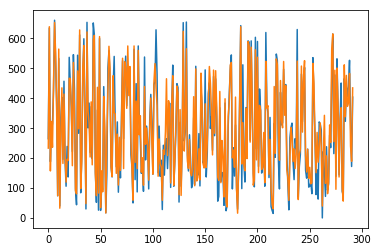

In [26]:
import matplotlib.pyplot  as plt
plt.plot(test_y)
plt.plot(predictions)
plt.show()

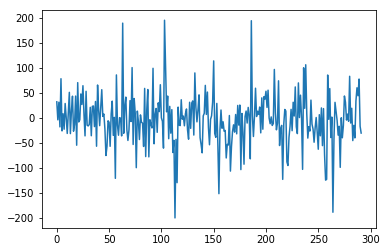

In [29]:
plt.plot((test_y - predictions))
plt.show()